In [1]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# loading climatologies 
# loading climatologies

prism = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/prec_03_PRISM_WorldClim.nc')
wrf = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/prec_03_WRF_coarse.nc')
coast = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/coast.nc')
dem = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/DEM.nc')
lat = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lat.nc')
lon = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lon.nc')

In [3]:
# loading extra HR covariates

prism_slope = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/prism_slope.nc')
prism_aspect = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/prism_aspect.nc')
prism_tpi = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/prism_tpi.nc')


In [4]:
# loading extra LR covariates

wrf_slope = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/wrf_slope.nc')
wrf_aspect = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/wrf_aspect.nc')
wrf_tpi = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/wrf_tpi.nc')
wrf_dem = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/wrf_dem.nc')

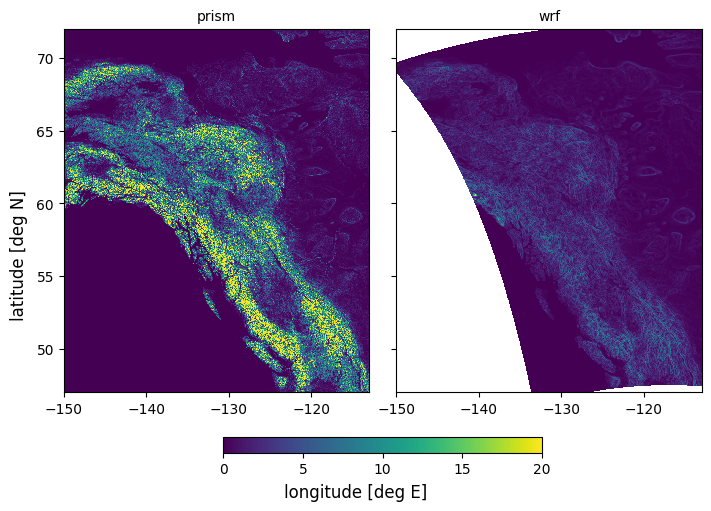

In [5]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

min = 0
max = 20

pc1 = ax[0].pcolormesh(prism_slope.longitude, prism_slope.latitude, prism_slope.slope, vmin=min, vmax=max, cmap='viridis', label=r'$m$')
ax[0].set_title(f'prism', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(wrf_slope.longitude, wrf_slope.latitude, wrf_slope.slope, vmin=min, vmax=max, cmap='viridis', label=r'$m$')
ax[1].set_title(f'wrf', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2])

In [6]:
# cropping to BC prism 

wrf = wrf.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
prism = prism.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
dem = dem.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
lat = lat.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
lon = lon.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
coast = coast.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))

In [7]:
# cropping to BC prism 

prism_slope = prism_slope.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
prism_aspect = prism_aspect.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
prism_tpi = prism_tpi.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))

wrf_slope = wrf_slope.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
wrf_aspect = wrf_aspect.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
wrf_tpi = wrf_tpi.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
wrf_dem = wrf_dem.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))


In [8]:
prism_prec = prism['prec']
wrf_prec = wrf['prec']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

In [9]:
prism_slope_var = prism_slope['slope']
prism_aspect_var = prism_aspect['aspect']
prism_tpi_var = prism_tpi['TPI']

wrf_slope_var = wrf_slope['slope']
wrf_aspect_var = wrf_aspect['aspect']
wrf_tpi_var = wrf_tpi['TPI']
wrf_dem_var = wrf_dem['DEM']

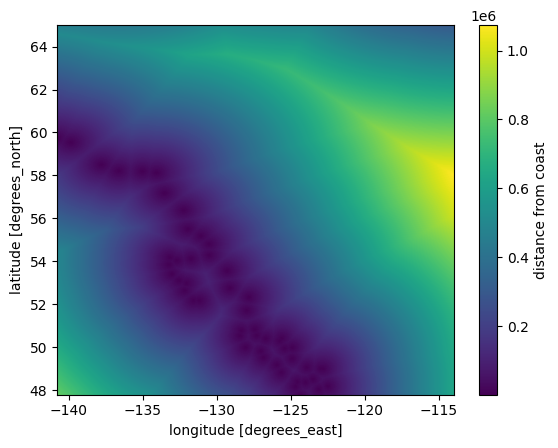

In [10]:
coast.dist.plot(cmap='viridis')

In [11]:
stand = pd.read_csv('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/standardization.csv')
# stand

In [12]:
# standardizing all variables 
prism['prec'] = (prism_prec - stand['mean'][0])/stand['std'][0]
wrf['prec'] = (wrf_prec - stand['mean'][1])/stand['std'][1]
coast['dist'] = (coast_dist - stand['mean'][2])/stand['std'][2]
dem['dem'] = (dem_dem - stand['mean'][3])/stand['std'][3]
lat['lat'] = (lat_lat - stand['mean'][4])/stand['std'][4]
lon['lon'] = (lon_lon - stand['mean'][5])/stand['std'][5]

prism_slope['slope'] = (prism_slope_var - stand['mean'][6])/stand['std'][6]
prism_aspect['aspect'] = (prism_aspect_var - stand['mean'][7])/stand['std'][7]
prism_tpi['TPI'] = (prism_tpi_var - stand['mean'][8])/stand['std'][8]

wrf_slope['slope'] = (wrf_slope_var - stand['mean'][9])/stand['std'][9]
wrf_aspect['aspect'] = (wrf_aspect_var - stand['mean'][10])/stand['std'][10]
wrf_tpi['TPI'] = (wrf_tpi_var - stand['mean'][11])/stand['std'][11]
wrf_dem['DEM'] = (wrf_dem_var - stand['mean'][12])/stand['std'][12]


In [13]:
wrf.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/wrf_large.nc')
coast.dist.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/coast_large.nc')
lat.lat.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/lat_large.nc')
lon.lon.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/lon_large.nc')
dem.dem.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/dem_large.nc')
prism.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/prism_large.nc')

In [14]:
prism_slope.slope.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/prism_slope_large.nc')
prism_aspect.aspect.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/prism_aspect_large.nc')
prism_tpi.TPI.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/prism_tpi_large.nc')

wrf_slope.slope.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/wrf_slope_large.nc')
wrf_aspect.aspect.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/wrf_aspect_large.nc')
wrf_tpi.TPI.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/wrf_tpi_large.nc')
wrf_dem.DEM.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/prec_march_nonan_extracov/wrf_dem_large.nc')